In [45]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [47]:
wine_data = pd.read_csv('./data/winequality-red.csv')
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.200,0.600,0.080,2.000,0.090,32.000,44.000,0.995,3.450,0.580,10.500,5
1595,5.900,0.550,0.100,2.200,0.062,39.000,51.000,0.995,3.520,0.760,11.200,6
1596,6.300,0.510,0.130,2.300,0.076,29.000,40.000,0.996,3.420,0.750,11.000,6
1597,5.900,0.645,0.120,2.000,0.075,32.000,44.000,0.995,3.570,0.710,10.200,5


In [48]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [49]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


In [50]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [51]:
wine_data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [52]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000,-0.256,0.672,0.115,0.094,-0.154,-0.113,0.668,-0.683,0.183,-0.062,0.124
volatile acidity,-0.256,1.000,-0.552,0.002,0.061,-0.011,0.076,0.022,0.235,-0.261,-0.202,-0.391
citric acid,0.672,-0.552,1.000,0.144,0.204,-0.061,0.036,0.365,-0.542,0.313,0.110,0.226
residual sugar,0.115,0.002,0.144,1.000,0.056,0.187,0.203,0.355,-0.086,0.006,0.042,0.014
chlorides,0.094,0.061,0.204,0.056,1.000,0.006,0.047,0.201,-0.265,0.371,-0.221,-0.129
free sulfur dioxide,-0.154,-0.011,-0.061,0.187,0.006,1.000,0.668,-0.022,0.070,0.052,-0.069,-0.051
total sulfur dioxide,-0.113,0.076,0.036,0.203,0.047,0.668,1.000,0.071,-0.066,0.043,-0.206,-0.185
density,0.668,0.022,0.365,0.355,0.201,-0.022,0.071,1.000,-0.342,0.149,-0.496,-0.175
pH,-0.683,0.235,-0.542,-0.086,-0.265,0.070,-0.066,-0.342,1.000,-0.197,0.206,-0.058
sulphates,0.183,-0.261,0.313,0.006,0.371,0.052,0.043,0.149,-0.197,1.000,0.094,0.251


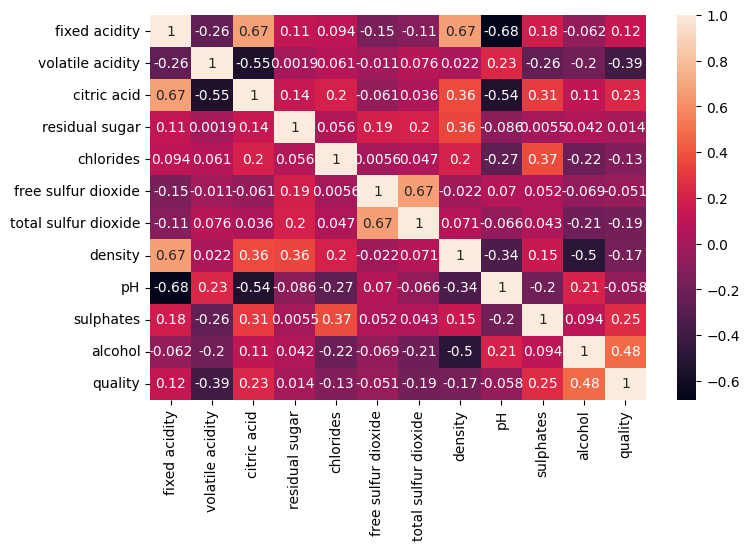

In [53]:
sns.heatmap(wine_data.corr(), annot=True)

plt.rcParams['figure.figsize'] = (8, 5)

plt.show()

In [74]:
# Split data into 2 sets, training and test
training_split = 0.75
training_split_idx = int(training_split * wine_data.shape[0])

x_train = wine_data.iloc[:training_split_idx, 1:]
y_train = wine_data.iloc[:training_split_idx, 0]

x_test = wine_data.iloc[training_split_idx:, 1:]
y_test = wine_data.iloc[training_split_idx:, 0]

print(f'Size of training set: {x_train.shape[0]}')
print(f'Size of test set: {x_test.shape[0]}')

Size of training set: 1199
Size of test set: 400


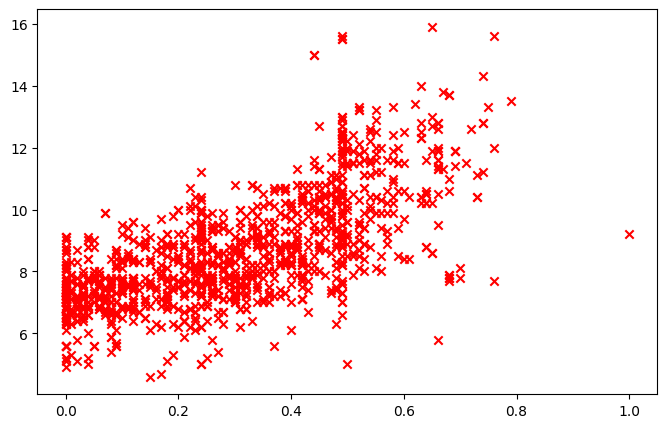

In [75]:
plt.scatter(x=training_set['citric acid'], y=training_set['fixed acidity'], marker='x', c='r')
plt.show()

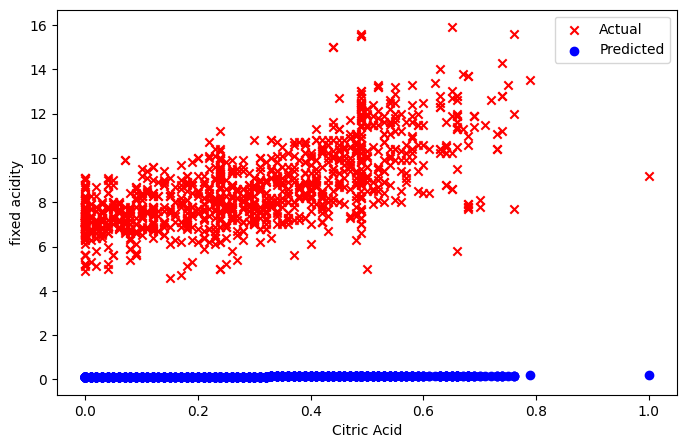

In [83]:
# Uni-variate Linear regression model


def compute_linear_regression(w: int, b: int, x_train_data, feature) -> int:
    y_predict = (w * x_train_data[feature]) + b
    return y_predict

w, b, feature = 0.1, 0.1, 'citric acid'

y_pred = compute_linear_regression(w, b, x_train, feature)

plt.scatter(x_train[feature], y_train, marker='x', c='r')
plt.scatter(x_train[feature], y_pred, c='b')

plt.xlabel('Citric Acid')
plt.ylabel('fixed acidity')

plt.legend(['Actual', 'Predicted'])


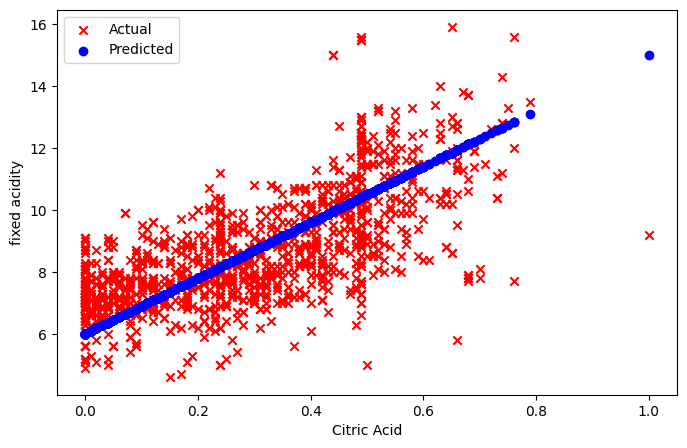

In [85]:
w, b, feature = 9, 6, 'citric acid'

y_pred = compute_linear_regression(w, b, x_train, feature)

plt.scatter(x_train[feature], y_train, marker='x', c='r')
plt.scatter(x_train[feature], y_pred, c='b')

plt.xlabel('Citric Acid')
plt.ylabel('fixed acidity')

plt.legend(['Actual', 'Predicted'])